In [2]:
import os
import matplotlib.pyplot as plt

from visual_graph_datasets.util import dynamic_import
from visual_graph_datasets.processing.base import ProcessingBase
from visual_graph_datasets.processing.molecules import MoleculeProcessing
from graph_attention_student.torch.megan import Megan

# Set matplotlib style to default
plt.style.use('default')

PATH = os.getcwd()
print('PATH: ', PATH)

PATH:  /media/ssd/Programming/graph_attention_student/graph_attention_student/scripts


In [3]:
MODEL_PATH = '/media/ssd/Programming/graph_attention_student/graph_attention_student/experiments/results/vgd_torch__megan__aqsoldb/2_layers__07_10_2024__08_50__NGli/rep00/model.ckpt'
print('MODEL_PATH: ', MODEL_PATH, os.path.exists(MODEL_PATH))

PROCESSING_PATH = '/media/ssd/.visual_graph_datasets/datasets/aqsoldb/process.py'
print('PROCESSING PATH: ', PROCESSING_PATH, os.path.exists(PROCESSING_PATH))

model = Megan.load(MODEL_PATH)
print('MODEL: ', type(model), model)

module = dynamic_import(PROCESSING_PATH)
processing: MoleculeProcessing = module.processing
print('PROCESSING: ', processing)

MODEL_PATH:  /media/ssd/Programming/graph_attention_student/graph_attention_student/experiments/results/vgd_torch__megan__aqsoldb/2_layers__07_10_2024__08_50__NGli/rep00/model.ckpt True
PROCESSING PATH:  /media/ssd/.visual_graph_datasets/datasets/aqsoldb/process.py True
MODEL:  <class 'graph_attention_student.torch.megan.Megan'> Megan(
  (lay_embedd): Linear(in_features=45, out_features=64, bias=True)
  (lay_transform_1): Linear(in_features=101, out_features=16, bias=True)
  (lay_transform_2): Linear(in_features=16, out_features=1, bias=False)
  (encoder_layers): ModuleList(
    (0): ParallelHeadAttention(
      (layers): ModuleList(
        (0-1): 2 x GraphAttentionLayerV2()
      )
      (lay_act): LeakyReLU(negative_slope=0.01)
    )
    (1): ParallelHeadAttention(
      (layers): ModuleList(
        (0-1): 2 x GraphAttentionLayerV2()
      )
      (lay_act): Identity()
    )
  )
  (lay_dropout_encoder): Dropout(p=0.0, inplace=False)
  (lay_pool): SumAggregation()
  (lay_pool_mean):

PRED:  [-4.781331]


/tmp/ipykernel_1744732/1058657676.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


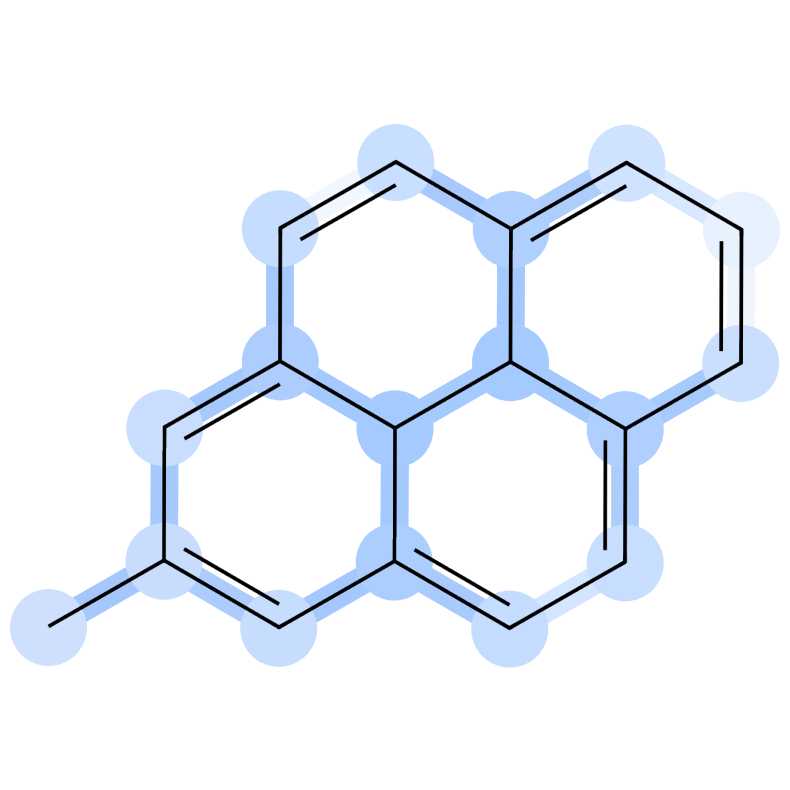

In [6]:
import tempfile
from graph_attention_student.torch.advanced import explain_value
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

blues = LinearSegmentedColormap.from_list('blues', ['white', '#A4CAFF'])
reds = LinearSegmentedColormap.from_list('redss', ['white', '#FF8890'])

#SMILES = 'C1=CC=C2C(=C1)C3=C(C=C(C=C3)CN)C4=CC=CC=C24'
#SMILES = 'CCCC(CC)CCC(=O)O'
#SMILES = 'C1=CC(=C(C=C1OC2=CC(=C(C(=C2)Cl)Cl)Cl)Cl)Cl'
#SMILES = 'CCCN'
#SMILES = 'CCCCCCCO'
SMILES = 'CC1=CC2=CC=C3C=CC=C4C=CC(=C1)C2C34'

fig, axs, info, graph = explain_value(
    value=SMILES,
    model=model,
    processing=processing,
    strategy='joint',
    color_maps=[blues, reds],
)
print('PRED: ', info['graph_output'])
ax = axs[0]
show_spines = False

ax.spines['top'].set_visible(show_spines)
ax.spines['right'].set_visible(show_spines)
ax.spines['bottom'].set_visible(show_spines)
ax.spines['left'].set_visible(show_spines)
ax.axis('off')

# Selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

# Selecting the axis-Y making the right and left axes False
plt.tick_params(axis='y', which='both', right=False,
                left=False, labelleft=False)

# https://stackoverflow.com/questions/4581504
fig.patch.set_facecolor((0, 0, 0, 0))
fig.patch.set_visible(False)

ax.patch.set_facecolor((0, 0, 0, 0))
ax.patch.set_visible(False)

fig.show()
fig.savefig('explanation.png', bbox_inches='tight', pad_inches=0, transparent=True)
